# This is the working area for testing parameters of cellpose for segmenting neurons in wbfm

__example data:__ /groups/zimmer/shared_projects/wbfm/cellpose_test_data <br>
__single frame:__ /groups/zimmer/shared_projects/wbfm/cellpose_test_data/img0000.png  
__single volume:__ /groups/zimmer/shared_projects/wbfm/cellpose_test_data/one_volume.tif  

The following tests will be done on a signle volume and their speed and accuracy will be noted. (a log file will be needed!)

### First, we need to check, which parameters and their values are going to be useful.  
For this, we will use an example dataset change the following 3 parameters in a sensible range and

3 parameters:  
- diameter         = diameter of the cells/nuclei in pixels
- flow_threshold   = threshold the flow gradient; higher = more relaxed!
- cell_probability = threshold of cell probability
 
Change the arguments in that order! The impact on time and accuracy mostly depends on diameter & flow_threshold  
 
 

In [1]:
# First test of how cellpose works in notebooks, then copy to a .py file to run on cluster

import numpy as np
import time, os, sys
import tifffile as tiff
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
from cellpose import utils, io

## TODO: logfile, import, load data, parameters as arguments, timing!, 

<class 'numpy.ndarray'>


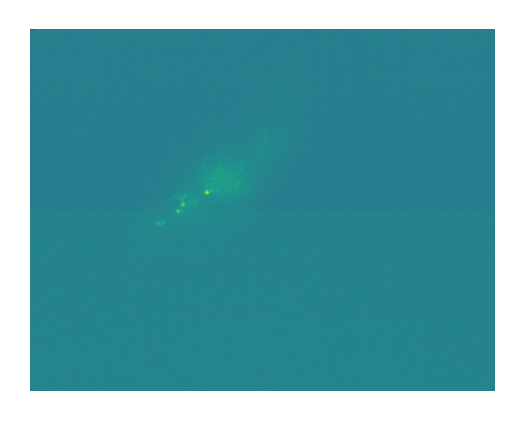

In [2]:
# files = ['img0.tif', 'img1.tif']
vol = '/groups/zimmer/shared_projects/wbfm/cellpose_test_data/one_volume.tif'
plane = '/groups/zimmer/shared_projects/wbfm/cellpose_test_data/img0000.png'
    
files = [vol]

# view 1 image
#img = io.imread(files[-1])

# with tiff.TiffFile(vol) as tif:
#     img = tiff.imread(vol)
img = io.imread(vol)
    
print(type(img))

plt.figure(figsize=(2,2))
plt.imshow(img[1,:,:])
plt.axis('off')
plt.show()


### Notes:
- when running in a notebook, set argument 'do_3D=True' in model.eval

In [3]:
tt = tiff.TiffFile(vol)
print(type(tt))
print(np.shape(tt.asarray()))

<class 'tifffile.tifffile.TiffFile'>
(33, 700, 900)


In [7]:
tiff.imsave('temp.tif', tt.asarray())

In [8]:
os.getcwd()

'/users/niklas.khoss/segmentation-git/segmentation'

In [ ]:
# RUN CELLPOSE

from cellpose import models, io

# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=False, model_type='cyto')

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# or if you have different types of channels in each image
channels = [0,0]

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended) 
# diameter can be a list or a single number for all images

# you can run all in a list e.g.
# >>> imgs = [io.imread(filename) in files]
# >>> masks, flows, styles, diams = model.eval(imgs, diameter=None, channels=channels)
# >>> io.masks_flows_to_seg(imgs, masks, flows, diams, files, channels)
# >>> io.save_to_png(imgs, masks, flows, files)

# the changeable parameters:
diam = 8
flow_thr = 0.7
cell_p = 0

# run in a list
imgs = [io.imread(vol)]
masks, flows, styles, diams = model.eval(imgs, diameter=diam, flow_threshold=flow_thr, channels=channels, net_avg=False)



# or in a loop
# for chan, filename in zip(channels, files):
#     img = io.imread(filename)
#     masks, flows, styles, diams = model.eval(img, diameter=None, channels=chan)

#     # save results so you can load in gui
#     io.masks_flows_to_seg(img, masks, flows, diams, filename, chan)

#     # save results as png
#     io.save_to_png(img, masks, flows, filename)
    

In [ ]:


io.masks_flows_to_seg(imgs, masks, flows, diams, vol, channels)
io.save_to_png(imgs, masks, flows, vol)

(700, 900)
()


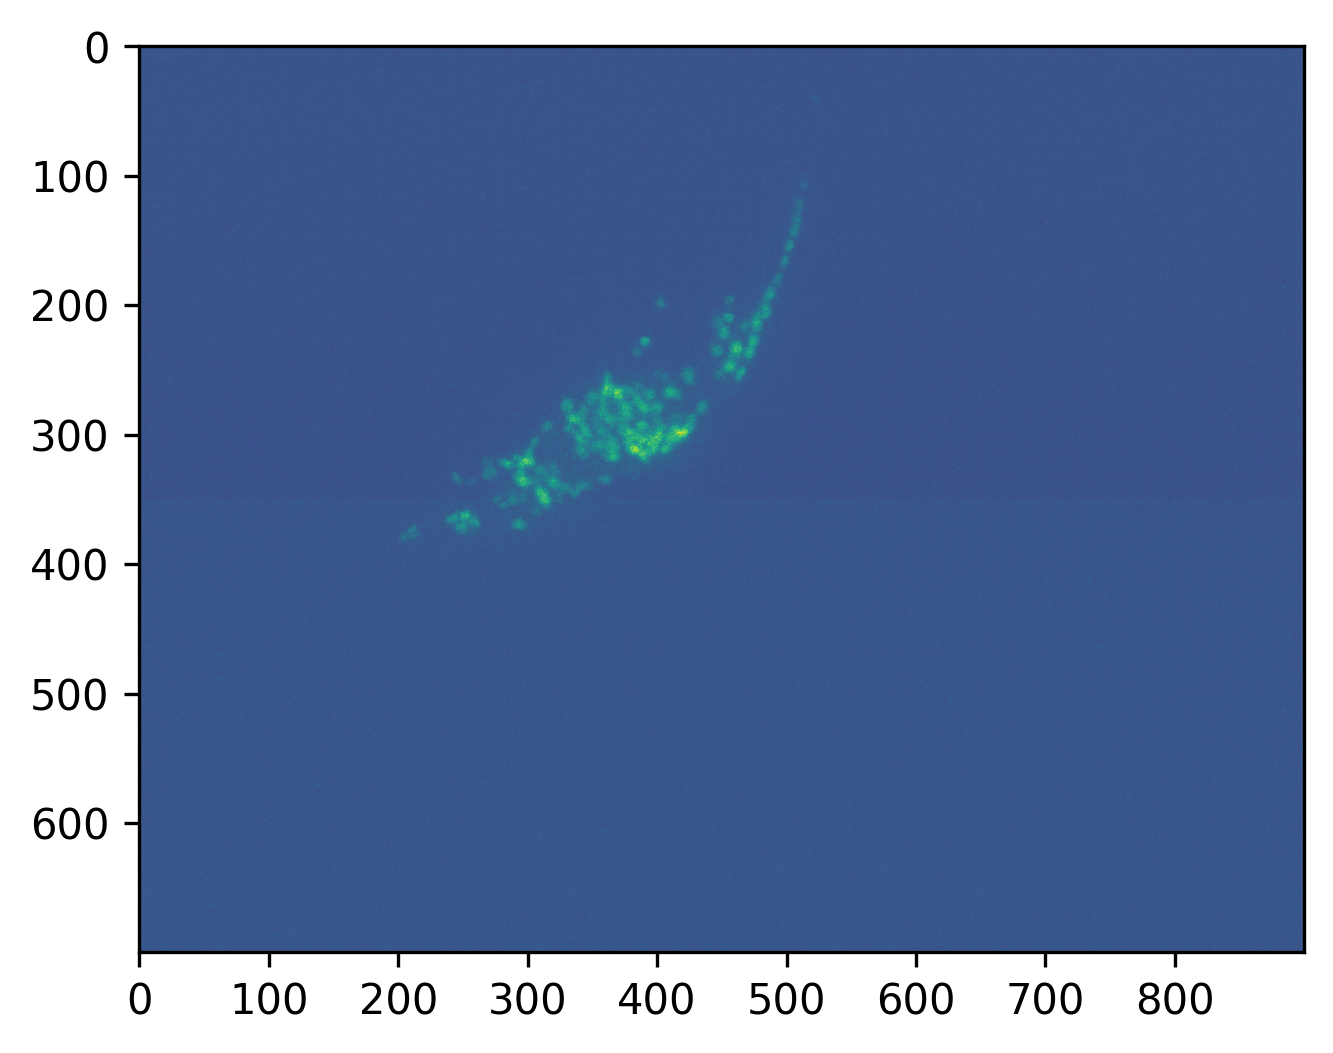

In [7]:
with tiff.TiffFile(vol) as img_vol:
    
    img_slice = img_vol.pages[0].asarray()
    print(np.shape(img_slice))
    print(np.shape(img_vol))
    plt.imshow(img_slice)

In [ ]:

# DISPLAY RESULTS
from cellpose import plot
chan = [0,0]
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig[, img, masks, flows[0], channels=chan)
plt.tight_layout()
plt.show()